# Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Chargement des documents NIPS</a></li>
        <li><a href="#ref2">Préparons les données pour l'analyse</a></li>
        <li><a href="#ref3">Traçons l'évolution de l'apprentissage automatique au fil du temps</a></li>
        <li><a href="#ref4">Prétraitement des données texte</a></li>
        <li><a href="#ref5">Un nuage de mots pour visualiser les données textuelles prétraitées</a></li>
        <li><a href="#ref6">Préparons le texte pour l'analyse LDA</a></li>
        <li><a href="#ref7">Analysons les tendances avec LDA</a></li>
        <li><a href="#ref8">L'avenir de l'apprentissage automatique</a></li>
    </ol>
</div>
<br>

<a id="ref1"></a>
## Chargement des documents NIPS
<p>La conférence NIPS (Neural Information Processing Systems) est l'un des événements annuels les plus prestigieux de la communauté du machine learning. Lors de chaque conférence NIPS, un grand nombre de documents de recherche sont publiés. Plus de 50 000 fichiers PDF ont été automatiquement téléchargés et traités pour obtenir un ensemble de données sur diverses techniques d'apprentissage automatique. Ces documents NIPS sont stockés dans <code>datasets/papers.csv</code>. Le fichier CSV contient des informations sur les différents articles NIPS qui ont été publiés de 1987 à 2017 (30 ans!). Ces articles abordent une grande variété de sujets dans l'apprentissage automatique, des réseaux de neurones aux méthodes d'optimisation et bien d'autres.
<img src="photos/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)"></p>
<p>Tout d'abord, nous allons explorer le fichier CSV pour déterminer quel type de données nous pouvons utiliser pour l'analyse et comment il est structuré. Un document de recherche se compose généralement d'un titre, d'un résumé et du texte principal. D'autres données telles que les figures et les tableaux n'ont pas été extraites des fichiers PDF. Chaque article traite d'une nouvelle technique ou d'une amélioration. Dans cette analyse, nous nous concentrerons sur l'analyse de ces articles avec des méthodes de traitement du langage naturel.</p>

In [1]:
# Importing modules
import pandas as pd
import zipfile36
import os

# memorize cwd
mycwd = os.getcwd()

# change cwd to obtain datasets
os.chdir("..")

# Read datasets/papers.csv into papers
zf = zipfile36.ZipFile('datasets/papers.csv.zip') 
papers = pd.read_csv(zf.open('papers.csv'))

# Print out the first rows of papers
print(papers.head())

# come back to first cwd
os.chdir(mycwd)

     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATI

<a id="ref2"></a>
## Préparons les données pour l'analyse
<p>Pour l'analyse des articles, nous nous intéressons uniquement aux données textuelles associées à l'article ainsi qu'à l'année de publication de l'article.</p>
<p>Nous analyserons ces données textuelles en utilisant le traitement du langage naturel. Étant donné que le fichier contient des métadonnées telles que les identifiants et les noms de fichiers, il est nécessaire de supprimer toutes les colonnes qui ne contiennent pas d'informations textuelles utiles.</p>

In [2]:
# Remove the columns
cols = ['id', 'event_type', 'pdf_name']
for col in cols:
    del papers[col]

# Print out the first rows of papers
print(papers.head())

   year                                              title          abstract  \
0  1987  Self-Organization of Associative Database and ...  Abstract Missing   
1  1987  A Mean Field Theory of Layer IV of Visual Cort...  Abstract Missing   
2  1988  Storing Covariance by the Associative Long-Ter...  Abstract Missing   
3  1994  Bayesian Query Construction for Neural Network...  Abstract Missing   
4  1994  Neural Network Ensembles, Cross Validation, an...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...  


<a id="ref3"></a>
## Traçons l'évolution de l'apprentissage automatique au fil du temps
<p>Afin de comprendre comment le domaine du machine learning a récemment explosé en popularité, nous allons commencer par visualiser le nombre de publications par an. </p>
<p>En regardant le nombre d'articles publiés par an, nous pouvons comprendre l'étendue de la «révolution» de l'apprentissage automatique! En règle générale, cette augmentation significative de la popularité est attribuée aux grandes quantités de puissance de calcul, aux données et aux améliorations des algorithmes.</p>

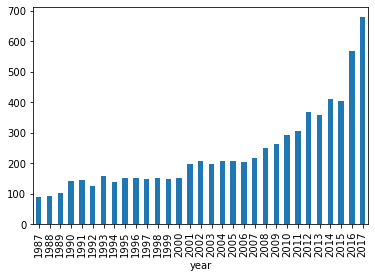

In [3]:
# Group the papers by year
groups = papers.groupby('year')

# Determine the size of each group
counts = groups['title'].count()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

<a id="ref4"></a>
## Prétraitement des données texte
<p>Analysons maintenant les titres des différents articles pour identifier les tendances d'apprentissage automatique. Tout d'abord, nous effectuerons un prétraitement simple sur les titres afin de les rendre plus adaptés à l'analyse. Nous utiliserons une expression régulière pour supprimer toute ponctuation dans le titre. Ensuite, nous les mettrons en minuscule. Nous imprimerons ensuite les premières lignes des titres avant et après l'application de la modification.</p>

In [4]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows 
print(papers['title_processed'].head())

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object


<a id="ref5"></a>
## Un nuage de mots pour visualiser les données textuelles prétraitées
<p>Afin de vérifier si le prétraitement s'est déroulé correctement, nous pouvons faire un nuage de mots des titres des articles de recherche. Cela nous donnera une représentation visuelle des mots les plus courants. La visualisation est la clé pour comprendre si nous sommes toujours sur la bonne voie! De plus, cela nous permet de vérifier si nous avons besoin d'un prétraitement supplémentaire avant d'analyser davantage les données de texte.</p>
<p>Python possède un grand nombre de bibliothèques! Au lieu d'essayer de développer une méthode pour créer nous-mêmes des nuages de mots, nous utiliserons celle d'Andreas Mueller <a href="http://amueller.github.io/word_cloud/">wordcloud library</a>.</p>

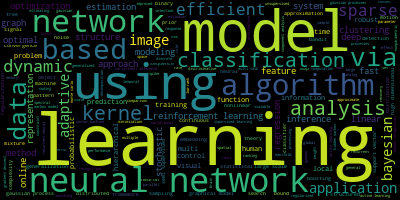

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

<a id="ref6"></a>
## Préparons le texte pour l'analyse LDA
<p>La principale méthode d'analyse de texte que nous utiliserons est l'allocation de Dirichlet latente (LDA). LDA est capable d'effectuer une détection de sujet sur de grands ensembles de documents, en déterminant quels sont les «sujets» principaux dans un grand ensemble de textes sans étiquette. Un «sujet» est un ensemble de mots qui tendent à coexister souvent. L'hypothèse est que LDA pourrait être en mesure de clarifier quels sont les différents sujets dans les titres de recherche. Ces sujets peuvent ensuite être utilisés comme point de départ pour une analyse plus approfondie.</p>
<p>LDA ne fonctionne pas directement sur les données texte. Tout d'abord, il est nécessaire de convertir les documents en une simple représentation vectorielle. Cette représentation sera ensuite utilisée par LDA pour déterminer les sujets. Chaque entrée d'un «vecteur de document» correspondra au nombre de fois qu'un mot est apparu dans le document. En conclusion, nous allons convertir une liste de titres en une liste de vecteurs, tous de longueur égale au vocabulaire. Par exemple, <em> 'Analyser les tendances d'apprentissage automatique avec des réseaux de neurones'. </em> serait transformé en <code> [1, 0, 1, ..., 1, 0] </code>.</p>
<p>Nous tracerons ensuite les 10 mots les plus courants en fonction du résultat de cette opération (la liste des vecteurs de documents). À titre de vérification, ces mots devraient également apparaître dans le nuage de mots.</p>

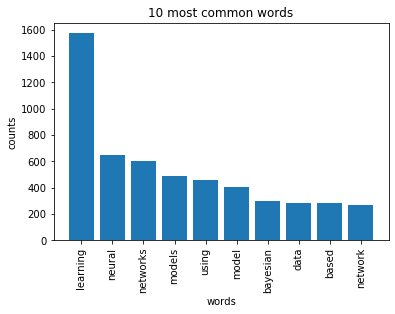

In [6]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

<a id="ref7"></a>
## Analysons les tendances avec LDA
<p>Enfin, les titres de recherche seront analysés à l'aide de LDA. Notez que pour traiter un nouvel ensemble de documents (par exemple des articles de presse), un ensemble similaire d'étapes sera nécessaire pour prétraiter les données. Le flux qui a été construit ici peut ainsi être facilement exporté pour un nouveau jeu de données texte.</p>
<p>Le seul paramètre que nous modifierons est le nombre de sujets dans l'algorithme LDA. En règle générale, on calcule la métrique de «perplexité» pour déterminer le nombre de sujets qui convient le mieux et itère sur différentes quantités de sujets jusqu'à ce que la «perplexité» la plus faible soit trouvée. Pour l'instant, jouons avec un nombre différent de sujets. À partir de là, nous pouvons distinguer de quoi traite chaque sujet («réseaux de neurones», «apprentissage par renforcement», «méthodes du noyau», «processus gaussiens», etc.).</p>

In [7]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 8
number_words = 4

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning sparse supervised semi

Topic #1:
neural networks network recurrent

Topic #2:
learning based kernel networks

Topic #3:
models learning gaussian inference

Topic #4:
analysis estimation high learning

Topic #5:
learning optimization reinforcement models

Topic #6:
information matrix rank data

Topic #7:
using model vector machines


<a id="ref8"></a>
## L'avenir de l'apprentissage automatique
<p>L'apprentissage automatique est devenu de plus en plus populaire au cours des dernières années. Le nombre de documents de conférence NIPS a augmenté de façon exponentielle, et les gens cherchent continuellement des moyens d'intégrer l'apprentissage automatique dans leurs produits et services.</p>
<p>Bien que cette analyse se concentre sur l'analyse des tendances de l'apprentissage automatique dans la recherche, beaucoup de ces techniques sont rapidement adoptées dans l'industrie. Suivre les dernières tendances de l'apprentissage automatique est une compétence essentielle pour un data scientist, et il est recommandé de continuer à apprendre en continu en parcourant des blogs, des tutoriels et des cours.</p>

In [8]:
# The historical data indicates that:
more_papers_published_in_2018 = True

# Merci d'avoir lu ce notebook!

<strong>Auteur:</strong>  <a href="https://www.linkedin.com/in/oscieux/">Olivier Scieux</a>, Data Scientist & Actuaire Produit NextGen

<p>Pendant plus de 15 ans comme actuaire produit, <a href="https://www.linkedin.com/in/oscieux/"> Olivier Scieux </a> a eu pour missions de créer de nouvelles offres, étudier la rentabilité des portefeuilles, suivre les performances et les risques.</p>

<p>Conscient de l'impact de la révolution numérique sur les entreprises, il a repensé son métier et a trouvé un moyen pour apprivoiser cet environnement.</p>

<p>Devenu adepte des formations en ligne qu'il pratique quotidiennement, <a href="https://www.linkedin.com/in/oscieux/">Olivier Scieux</a> a acquis les connaissances en data science qui lui permettent aujourd'hui de proposer ses compétences de data scientist et d'actuaire produit nouvelle génération.</p>

<p>Grâce à son expertise, il aide les entreprises à mieux comprendre leurs données afin de leur donner du sens et d'en extraire de la valeur pour les aider à prendre des décisions stratégiques ou opérationnelles.</p>

<hr>

<p>Copyright &copy; 2020 <a href="https://oscieux.github.io/">OSDS</a>.</p>